In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gensim
from wordcloud import WordCloud
import warnings
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report as cr

warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [5]:
dataset = pd.read_csv("IMDB Dataset.csv")
#dataset.drop(dataset.tail(44930).index, inplace = True) - will reduce the 50000 review dataset to 5070 reviews
reviews = [w for w in dataset["review"]]
tokenized_words = [gensim.utils.simple_preprocess(w) for w in reviews]
#tokenized_words

In [6]:
#wordcloud = WordCloud(width = 500, height = 500).generate(dataset["review"])
#plt.figure(figsize = (12, 8), facecolor = 'k')
#plt.imshow(wordcloud)
#plt.show()

In [7]:
# CBOW
CBOW = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                              vector_size = 100, window = 5)

In [8]:
# Skip Gram
Skip_Gram = gensim.models.Word2Vec(tokenized_words, min_count = 1,
                                   vector_size = 100, window = 5, sg = 1)

In [9]:
print(CBOW.wv.most_similar('movie'))

[('film', 0.9303526282310486), ('flick', 0.74705970287323), ('it', 0.6988739371299744), ('show', 0.6479271650314331), ('sequel', 0.621499240398407), ('movies', 0.6167551875114441), ('documentary', 0.605934202671051), ('episode', 0.5937536954879761), ('picture', 0.5883586406707764), ('series', 0.5730072259902954)]


In [10]:
print(Skip_Gram.wv.most_similar('movie'))

[('film', 0.9291965365409851), ('flick', 0.8323894739151001), ('sequal', 0.807877779006958), ('it', 0.8065990209579468), ('noroi', 0.7951966524124146), ('elektra', 0.7940001487731934), ('crapfest', 0.7921146750450134), ('doco', 0.788210928440094), ('snoozer', 0.7865471839904785), ('atleast', 0.7861261367797852)]


In [11]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec CBOW : ",
CBOW.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec CBOW :  0.93035275


In [12]:
print("Similarity between the words 'film' " +
"and 'movie' - Word2vec Skip Gram : ",
Skip_Gram.wv.similarity('film', 'movie'))

Similarity between the words 'film' and 'movie' - Word2vec Skip Gram :  0.9291965


In [13]:
CBOW.wv["word"]

array([ 1.7159266 , -1.1421722 , -0.7119331 , -1.6719995 , -2.66326   ,
       -0.63419473,  0.5334265 ,  2.000339  ,  0.8996055 , -0.25845808,
       -1.0332469 , -0.6850933 ,  1.1888944 , -0.72614723,  0.15141408,
       -0.17149262, -2.253898  ,  0.87648195,  1.1192538 ,  1.1473874 ,
       -0.02802755,  0.7930738 , -0.6090588 ,  3.3655593 , -1.0116022 ,
       -4.4357643 , -1.001744  , -2.3854086 , -0.7117798 , -0.8874235 ,
       -0.58026433,  1.8396884 , -1.5676533 , -1.7071825 , -1.1839861 ,
        1.4686437 , -0.09276101, -0.53003645, -0.04563599, -0.77646244,
        1.9618874 , -0.7714726 ,  1.3706942 ,  1.5979377 , -0.23905003,
       -0.0484894 , -1.2672554 , -0.45410874, -1.3956261 ,  1.4703884 ,
        2.2424934 ,  0.03305174, -0.15195139,  0.18914866,  1.5239503 ,
       -0.4280838 , -0.48853734, -0.03445521, -0.82586014, -0.6144493 ,
       -0.21910878, -0.15615071, -1.3043115 ,  0.22419457,  1.8750609 ,
        0.73769283, -3.0752919 ,  1.124145  , -0.21050179, -3.23

In [14]:
#vocab = list(CBOW.wv.key_to_index)
#X = CBOW.wv[vocab]

#tsne = TSNE(n_components = 2)
#X_tsne = tsne.fit_transform(X)

#df = pd.DataFrame(X_tsne, index = vocab, columns = ['x', 'y'])

#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

#ax.scatter(df['x'], df['y'])

#for word, pos in df.iterrows():
#    ax.annotate(word, pos)

In [15]:
def display_closestwords_tsnescatterplot(model, modelName, word, size):
    
    arr = np.empty((0, size), dtype = 'f')
    word_labels = [word]

    close_words = model.similar_by_word(word)
    
    arr = np.append(arr, np.array([model[word]]), axis = 0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis = 0)
        
        tsne = TSNE(n_components = 2, random_state = 0)
        np.set_printoptions(suppress = True)
        Y = tsne.fit_transform(arr)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy = (x, y), xytext = (0, 0), textcoords = 'offset points')
    plt.xlim(x_coords.min() + 0.00005, x_coords.max() + 0.00005)
    plt.ylim(y_coords.min() + 0.00005, y_coords.max() + 0.00005)
    plt.title("Top 10 closest words to 'movie' - Word2vec " + modelName, pad = 20)
    plt.show()

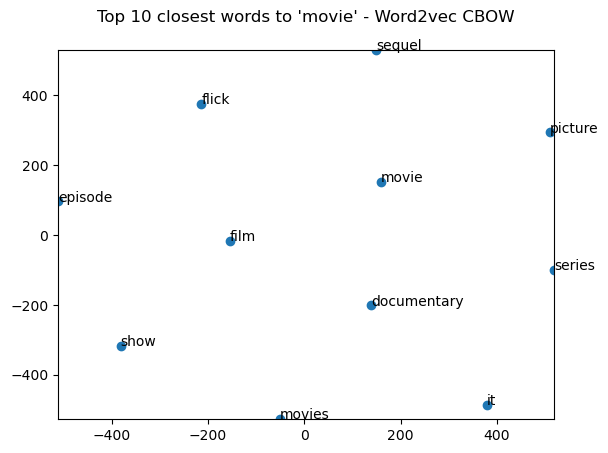

In [16]:
display_closestwords_tsnescatterplot(CBOW.wv, 'CBOW', 'movie', 100)

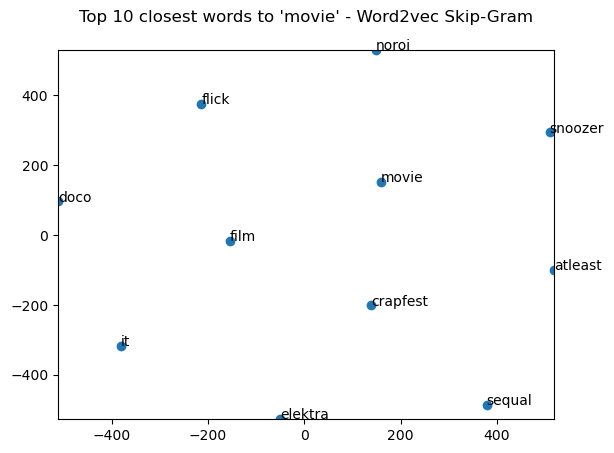

In [17]:
display_closestwords_tsnescatterplot(Skip_Gram.wv, 'Skip-Gram', 'movie', 100)

In [18]:
# CBOW
def getReviewVector(doc):
    return np.mean([CBOW.wv[word] for word in doc if word in CBOW.wv.index_to_key], axis = 0)

In [19]:
x = []
for i in range(len(tokenized_words)):
    x.append(getReviewVector(tokenized_words[i]))

In [20]:
y = pd.get_dummies(dataset["sentiment"])
y = y.iloc[:,1].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
CBOW_NB = GaussianNB().fit(X_train, y_train)

In [23]:
CBOW_NB_prediction = CBOW_NB.predict(X_test)

In [24]:
score = accuracy_score(y_test, CBOW_NB_prediction)
print(score)
print(cr(y_test, CBOW_NB_prediction))

0.6966
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      5035
           1       0.71      0.67      0.69      4965

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [25]:
# Skip-Gram
def getReviewVector(doc):
    return np.mean([Skip_Gram.wv[word] for word in doc if word in Skip_Gram.wv.index_to_key], axis = 0)

In [ ]:
x = []
for i in range(len(tokenized_words)):
    x.append(getReviewVector(tokenized_words[i]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
Skip_Gram_NB = GaussianNB().fit(X_train, y_train)

In [ ]:
Skip_Gram_NB_prediction = Skip_Gram_NB.predict(X_test)

In [ ]:
score = accuracy_score(y_test, Skip_Gram_NB_prediction)
print(score)
print(cr(y_test, Skip_Gram_NB_prediction))